In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_shooting = pd.read_excel('Book1.xlsx')
df_jb = pd.read_excel('jb_stats.xlsx')
df_jb_postseason = pd.read_excel('jb_stats_playoffs.xlsx')
df_pergame = pd.read_excel('league_stats_perGame_2023.xlsx')
df_pergame_postseason = pd.read_excel('league_playoffs_pergame.xlsx')
df_transition = pd.read_excel('league_transition.xlsx')
df_advanced = pd.read_excel('advanced_stats.xlsx')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df_shooting = df_shooting.drop(['Rk'], axis=1)

---
# Overview

In [5]:
#Drop career totals row
df_jb = df_jb.drop(index=[7])

### Career stats progression

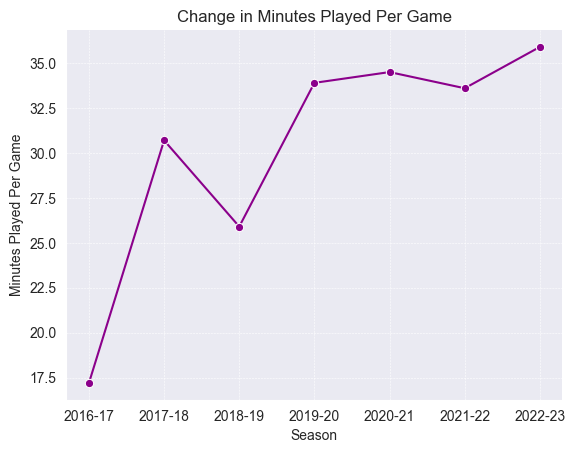

In [209]:
sns.set_style('darkgrid')
sns.lineplot(x='Season', y='MP', data=df_jb, marker='o', color='darkmagenta')
plt.ylabel('Minutes Played Per Game')
plt.title('Change in Minutes Played Per Game')
sns.despine()
plt.grid(linewidth = '0.4', linestyle = '--')
plt.show()

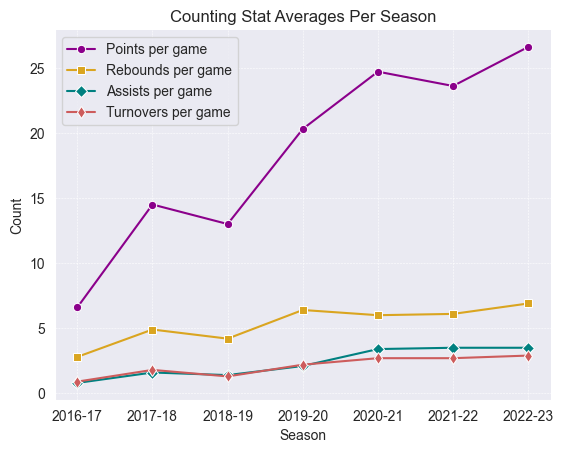

In [210]:
sns.set_style('darkgrid')
sns.lineplot(x='Season', y='PTS', data=df_jb, label='Points per game', marker='o', color='darkmagenta')
sns.lineplot(x='Season', y='TRB', data=df_jb, label='Rebounds per game', marker='s', color='goldenrod')
sns.lineplot(x='Season', y='AST', data=df_jb, label='Assists per game', marker='D', color='teal')
sns.lineplot(x='Season', y='TOV', data=df_jb, label='Turnovers per game', marker='d', color='indianred')
plt.ylabel('Count')
plt.title('Counting Stat Averages Per Season')
sns.despine()
plt.grid(linewidth = '0.4', linestyle = '--')
plt.show()

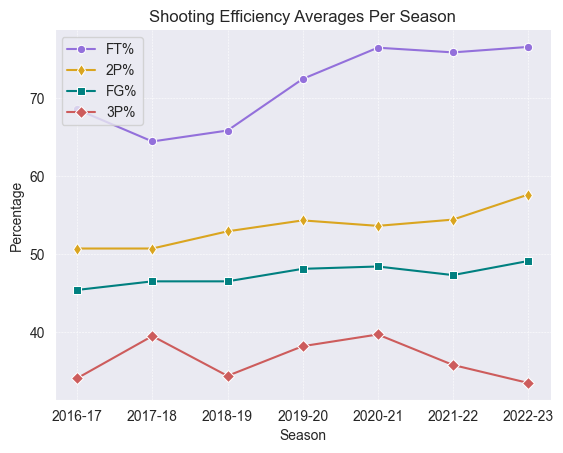

In [211]:
sns.set_style('darkgrid')
sns.lineplot(x='Season', y=df_jb['FT%']*100, data=df_jb, label='FT%', marker='o', color='mediumpurple')
sns.lineplot(x='Season', y=df_jb['2P%']*100, data=df_jb, label='2P%', marker='d', color='goldenrod')
sns.lineplot(x='Season', y=df_jb['FG%']*100, data=df_jb, label='FG%', marker='s', color='teal')
sns.lineplot(x='Season', y=df_jb['3P%']*100, data=df_jb, label='3P%', marker='D', color='indianred')
plt.ylabel('Percentage')
plt.title('Shooting Efficiency Averages Per Season')
sns.despine()
plt.legend(loc='upper left')
plt.grid(linewidth = '0.4', linestyle = '--')
plt.show()

### Stats comparison to league average (2022-23)

In [212]:
#Filter for players who have played at least 45 games and averaged at least 30 minutes a night
df_adjusted = df_pergame[(df_pergame['MP'] >= 30) & (df_pergame['G'] >= 45)]
df_adjusted.shape

(101, 30)

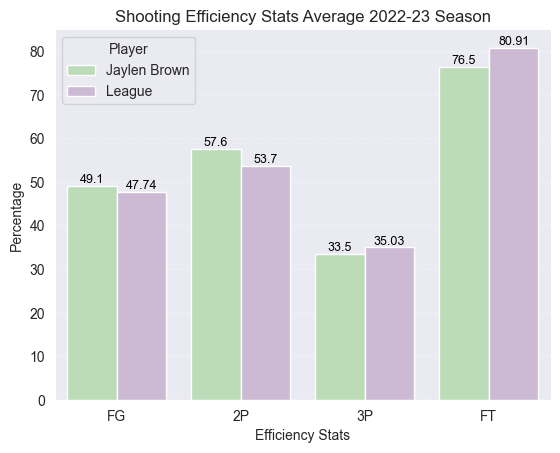

In [214]:
league_fg = df_adjusted['FG%'].mean() * 100
league_2p = df_adjusted['2P%'].mean() * 100
league_3p = df_adjusted['3P%'].mean() * 100
league_ft = df_adjusted['FT%'].mean() * 100

jb_fg = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'FG%'].item() * 100
jb_2p = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', '2P%'].item() * 100
jb_3p = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', '3P%'].item() * 100
jb_ft = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'FT%'].item() * 100

data = {'Percentage': [jb_fg, jb_2p, jb_3p, jb_ft, league_fg, league_2p, league_3p, league_ft], 
        'Player': ['Jaylen Brown', 'Jaylen Brown', 'Jaylen Brown', 'Jaylen Brown', 'League', 'League', 'League', 'League'], 
        'Metric': ['FG', '2P', '3P', 'FT', 'FG', '2P', '3P', 'FT']}

final_df = pd.DataFrame(data)
sns.set_style('darkgrid')
ax = sns.barplot(x='Metric', y = 'Percentage', hue='Player', data = final_df, palette='PRGn_r')
for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{round(bar_value, 2)}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom',
          size=9, color='black')
sns.despine()
plt.xlabel('Efficiency Stats')
plt.title('Shooting Efficiency Stats Average 2022-23 Season')
plt.grid(axis='y', linewidth = 0.3, linestyle='--')
plt.show()

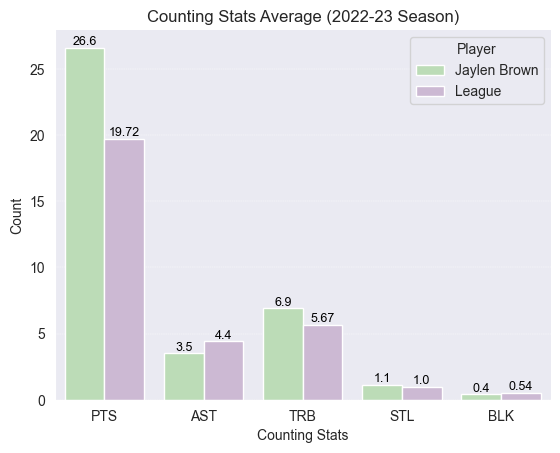

In [215]:
league_pts = df_adjusted['PTS'].mean()
league_ast = df_adjusted['AST'].mean()
league_trb = df_adjusted['TRB'].mean()
league_stl = df_adjusted['STL'].mean()
league_blk = df_adjusted['BLK'].mean()

jb_pts = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'PTS'].item()
jb_ast = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'AST'].item()
jb_trb = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'TRB'].item()
jb_stl = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'STL'].item()
jb_blk = df_pergame.loc[df_pergame['Player'] == 'Jaylen Brown', 'BLK'].item()

data = {'Count': [jb_pts, jb_ast, jb_trb, jb_stl, jb_blk, league_pts, league_ast, league_trb, league_stl, league_blk], 
        'Player': ['Jaylen Brown', 'Jaylen Brown', 'Jaylen Brown', 'Jaylen Brown', 'Jaylen Brown', 'League', 'League', 'League', 'League', 'League'], 
        'Metric': ['PTS', 'AST', 'TRB', 'STL', 'BLK', 'PTS', 'AST', 'TRB', 'STL', 'BLK']}

final_df = pd.DataFrame(data)
sns.set_style('darkgrid')
ax = sns.barplot(x='Metric', y = 'Count', hue='Player', data = final_df, palette='PRGn_r')
for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{round(bar_value, 2)}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom',
          size=9, color='black')
plt.grid(axis='y', linewidth = 0.3, linestyle='--')
plt.title('Counting Stats Average (2022-23 Season)')
plt.xlabel('Counting Stats')
sns.despine()
plt.show()

---
# Strengths

### Mid-range efficiency and output

In [216]:
# Filter for players who 
# - took at least 10% of total shots from 10-16
# - played at least 1000 minutes over the 2022-23 season
# - played at least 50/83 games
df_midrange = df_shooting[(df_shooting['% of 10-16'] >= 0.1) & (df_shooting['MP'] > 1000)
            & (df_shooting['G'] > 50)]

In [217]:
# Drop duplicates for players who changed teams mid-season, keeping the first row which holds the combined stats
df_midrange = df_midrange.drop_duplicates(subset='Player', keep='first')
df_midrange[df_midrange.duplicated(['Player'])]

,Player,Pos,G,MP,FG%,Dist.,% of 2P,% of 0-3,% of 3-10,% of 10-16,% of 16-3P,% of 3P,FG% 2P,FG% 0-3,FG% 3-10,FG% 10-16,FG% 16-3P,FG% 3P,% of 2P.1,% of 3P.1,Dunk %FGA,Dunk #,Corner %3PA,Corner 3P%


In [218]:
# Get the top 10 players by mid-range (10-16ft) shooting efficiency
df_top10midrange = df_midrange.nlargest(n=10, columns=['FG% 10-16'])

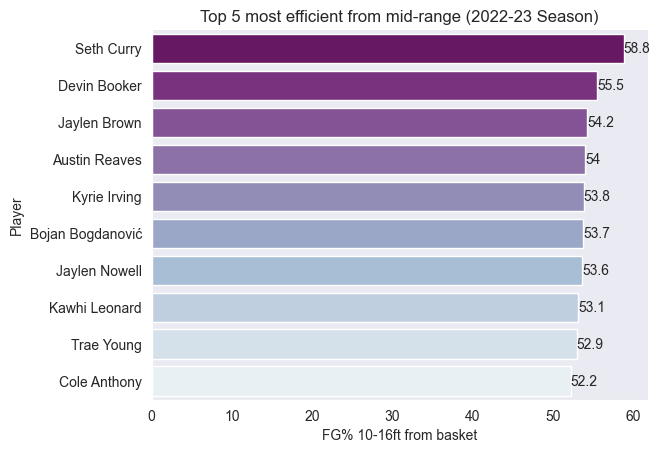

In [219]:
sns.set_style('dark')
ax = sns.barplot(y = df_top10midrange['Player'], x = df_top10midrange['FG% 10-16']*100, orient = 'h', palette='BuPu_r')
plt.title('Top 5 most efficient from mid-range (2022-23 Season)')
plt.ylabel('Player')
plt.xlabel('FG% 10-16ft from basket')
sns.despine()
ax.bar_label(ax.containers[0])
plt.show()

In [220]:
#Get the top 50 players by mid-range (10-16ft) shooting efficiency
df_midrange = df_midrange.nlargest(n=50, columns=['FG% 10-16'])

In [221]:
# Extract player name and points per game series to dataframe
# Join points per game dataframe to matching players in the top 50 mid-range shooters dataframe
df_ppg = df_pergame[['Player', 'PTS']].copy()
df_merged = pd.merge(df_ppg, df_midrange)

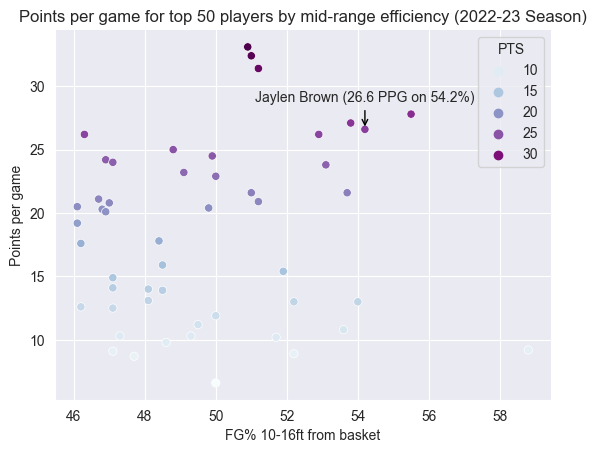

In [222]:
sns.set_style('darkgrid')
sns.scatterplot(x = df_merged['FG% 10-16']*100, y = 'PTS', data = df_merged, hue='PTS', palette='BuPu')
target_row = df_merged[df_merged['Player'] == 'Jaylen Brown']
x_value = target_row['FG% 10-16'].values[0]*100
y_value = target_row['PTS'].values[0]
plt.annotate('Jaylen Brown (' + str(y_value) + ' PPG on ' + str(x_value) + '%)', (x_value, y_value), textcoords="offset points", xytext=(0,20), 
             ha='center', arrowprops=dict(arrowstyle="->", color='black'), size=10)
plt.title('Points per game for top 50 players by mid-range efficiency (2022-23 Season)')
plt.xlabel('FG% 10-16ft from basket')
plt.ylabel('Points per game')
sns.despine()
plt.show()



### Transition scoring

In [223]:
# Get the top 25 players by transition posessions per game, sorted by points per transition posession
df_top25transition = df_transition.nlargest(n=25, columns=['POSS']).sort_values(by=['PPP'], ascending=False)

In [224]:
df_top25transition.head(20).sort_values(by=['POSS'], ascending=False)

,PLAYER,TEAM,GP,POSS,FREQ%,PPP,PTS,FGM,FGA,FG%,EFG%,FT\nFREQ%,TOV\nFREQ%,SF\nFREQ%,AND ONE\nFREQ%,SCORE\nFREQ%,PERCENTILE
0,Giannis Antetokounmpo,MIL,63,8.0,27.2,1.16,9.3,3.1,5.2,60,61.5,31.6,11.0,30.2,8.1,59.8,56.4
1,LeBron James,LAL,55,6.8,24.7,1.22,8.3,3.1,4.9,64,66.7,20.5,13.9,19.5,6.1,59.5,68.7
2,Shai Gilgeous-Alexander,OKC,68,6.0,21.7,1.26,7.6,2.4,4.3,56,59.2,25.4,8.0,22.4,3.9,60.7,76.2
3,Jaylen Brown,BOS,67,5.9,23.0,1.25,7.4,2.9,4.6,63,66.9,14.9,9.6,14.7,3.5,60.3,75.6
4,Desmond Bane,MEM,58,5.6,28.3,1.19,6.6,2.5,4.8,52,62.3,8.4,8.4,7.7,3.4,49.8,64.3
5,De'Aaron Fox,SAC,73,5.5,23.4,1.20,6.5,2.4,4.0,60,62.9,20.1,11.1,18.8,5.5,57.5,66.8
7,Ja Morant,MEM,61,5.3,20.0,1.14,6.1,2.3,3.8,60,63.7,16.9,15.3,14.7,4.0,55.2,53.2
6,Anthony Edwards,MIN,79,5.3,21.2,1.08,5.7,2.0,3.7,54,59.8,18.8,17.1,18.3,7.0,49.5,40.3
9,Kyrie Irving,BKN,40,4.8,19.7,1.07,5.2,1.9,4.0,48,57.3,7.8,11.5,7.8,2.1,45.3,38.8
10,Devin Booker,PHX,53,4.7,18.3,1.13,5.2,2.0,3.8,52,58.8,12.6,10.1,10.5,3.6,51.4,51.1


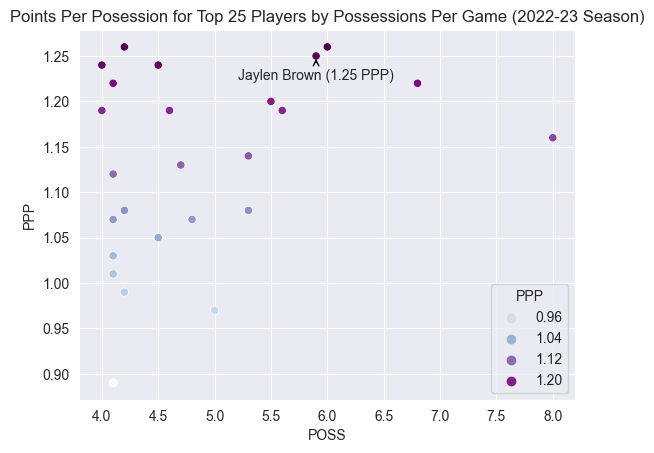

In [225]:
sns.scatterplot(x='POSS', y='PPP', data=df_top25transition, hue='PPP', palette='BuPu')
target_row = df_top25transition[df_top25transition['PLAYER'] == 'Jaylen Brown']
x_value = target_row['POSS'].values[0]
y_value = target_row['PPP'].values[0]
plt.annotate('Jaylen Brown (' + str(y_value) + ' PPP)', (x_value, y_value), textcoords="offset points", xytext=(0,-17), 
             ha='center', arrowprops=dict(arrowstyle="->", color='black'), size=10)
plt.title('Points Per Posession for Top 25 Players by Possessions Per Game (2022-23 Season)')
plt.show()

In [226]:
# Get the top 10 by points per posession from the top 25 by possessions per game
df_top10transition = df_top25transition.nlargest(n=10, columns=['PPP']).sort_values(by=['PPP'], ascending=False)

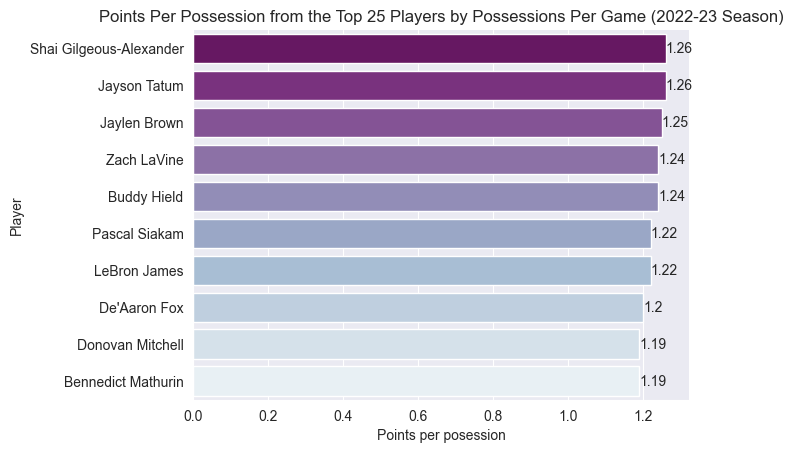

In [228]:
ax = sns.barplot(x='PPP', y='PLAYER', data=df_top10transition, orient='h', palette='BuPu_r')
plt.title('Points Per Possession from the Top 25 Players by Possessions Per Game (2022-23 Season)')
plt.xlabel('Points per posession')
plt.ylabel('Player')
sns.despine()
ax.bar_label(ax.containers[0])
plt.show()

### Defense

In [229]:
# Filter out positions with low sample size
df_advanced = df_advanced[(df_advanced['Pos'] != 'PF-C') & (df_advanced['Pos'] != 'PF-SF') & (df_advanced['Pos'] != 'SF-PF') & (df_advanced['Pos'] != 'PG-SG') & (df_advanced['Pos'] != 'SG-PG') & (df_advanced['Pos'] != 'SF-SG')]

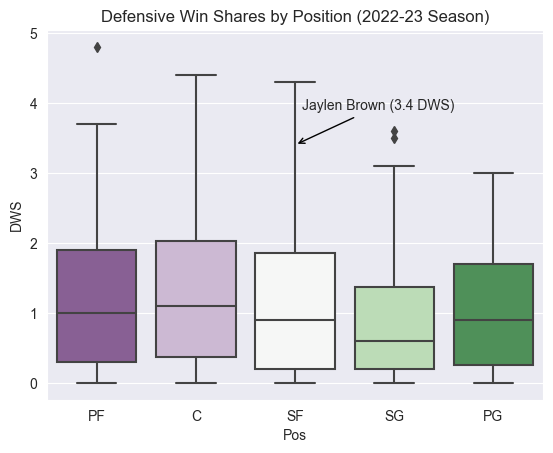

In [230]:
row = df_advanced[df_advanced['Player'] == 'Jaylen Brown']
y = row['DWS'].values[0]
plt.annotate('Jaylen Brown (' + str(y) + ' DWS)', (2, y), textcoords="offset points", xytext=(60,25), 
             ha='center', arrowprops=dict(arrowstyle="->", color='black'), size=10)
plt.title('Defensive Win Shares by Position (2022-23 Season)')
sns.boxplot(data=df_advanced, y = 'DWS', x='Pos', palette='PRGn')
plt.show()

---
# Weaknesses

In [231]:
# Filter league post season dataframe for players who averaged at least 30 minutes per game
df_adjusted_postseason = df_pergame_postseason[df_pergame_postseason['MP'] >= 30]

### Turnovers and freethrow percentage differential to league average in regular and post season

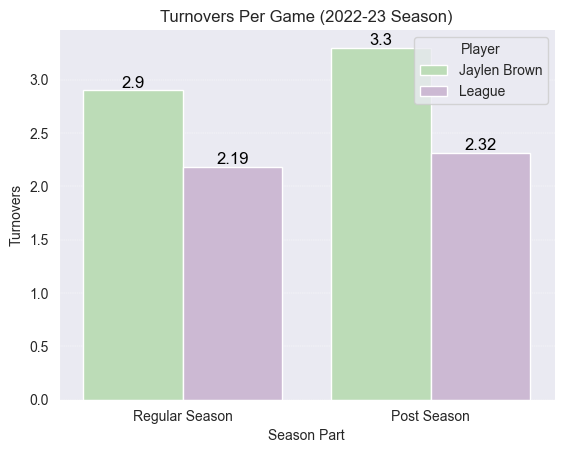

In [233]:
league_tov_postseason = df_adjusted_postseason['TOV'].mean()
league_tov_reg = df_adjusted['TOV'].mean()
jb_tov_reg = df_jb.loc[df_jb['Season'] == '2022-23', 'TOV'].item()
jb_tov_postseason = df_jb_postseason.loc[df_jb_postseason['Season'] == '2022-23', 'TOV'].item()

data = {'Turnovers': [jb_tov_reg, jb_tov_postseason, league_tov_reg, league_tov_postseason], 
        'Player': ['Jaylen Brown', 'Jaylen Brown', 'League', 'League'], 
        'Season Part': ['Regular Season', 'Post Season', 'Regular Season', 'Post Season']}

final_df = pd.DataFrame(data)

ax = sns.barplot(x='Season Part', y='Turnovers', hue='Player', data=final_df, palette='PRGn_r')
sns.despine()
plt.grid(axis='y', linewidth = 0.3, linestyle='--')
plt.title('Turnovers Per Game (2022-23 Season)')
for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{round(bar_value, 2)}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom',
          size=12, color='black')
plt.show()

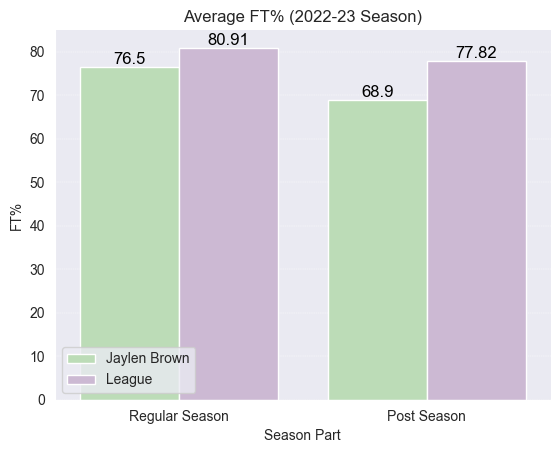

In [101]:
league_ft_postseason = df_adjusted_postseason['FT%'].mean()
league_ft_reg = df_adjusted['FT%'].mean()
jb_ft_reg = df_jb.loc[df_jb['Season'] == '2022-23', 'FT%'].item()
jb_ft_postseason = df_jb_postseason.loc[df_jb_postseason['Season'] == '2022-23', 'FT%'].item()

data = {'FT%': [jb_ft_reg, jb_ft_postseason, league_ft_reg, league_ft_postseason], 
        'Player': ['Jaylen Brown', 'Jaylen Brown', 'League', 'League'], 
        'Season Part': ['Regular Season', 'Post Season', 'Regular Season', 'Post Season']}

final_df = pd.DataFrame(data)

ax = sns.barplot(x='Season Part', y=final_df['FT%']*100, hue='Player', data=final_df, palette='PRGn_r')
plt.grid(axis='y', linewidth = 0.3, linestyle='--')
plt.title('Average FT% (2022-23 Season)')
plt.legend(loc='lower left')
sns.despine()
for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{round(bar_value, 2)}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom',
          size=12, color='black')
plt.show()


### Considering fatigue from high number of games played

In [103]:
# Further filter for players who played at least 18 games in the post season
df_adjusted_postseason_gp = df_adjusted_postseason[df_adjusted_postseason['G'] >= 18]

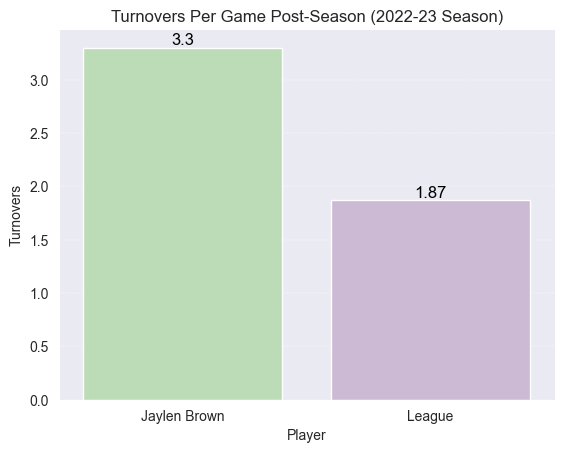

In [104]:
jb_tov_postseason = df_jb_postseason.loc[df_jb_postseason['Season'] == '2022-23', 'TOV'].item()
league_tov_postseason = df_adjusted_postseason_gp['TOV'].mean()

data =[['Jaylen Brown', jb_tov_postseason], ['League', league_tov_postseason]]

final_df = pd.DataFrame(data, columns=['Player', 'Turnovers'])
  
ax = sns.barplot(x='Player', y='Turnovers', data=final_df, palette='PRGn_r')
sns.despine()
plt.grid(axis='y', linewidth = 0.3, linestyle='--')
plt.title('Turnovers Per Game Post-Season (2022-23 Season)')
for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{round(bar_value, 2)}'
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  ax.text(text_x, text_y, text, ha='center', va='bottom',
          size=12, color='black')
plt.show()


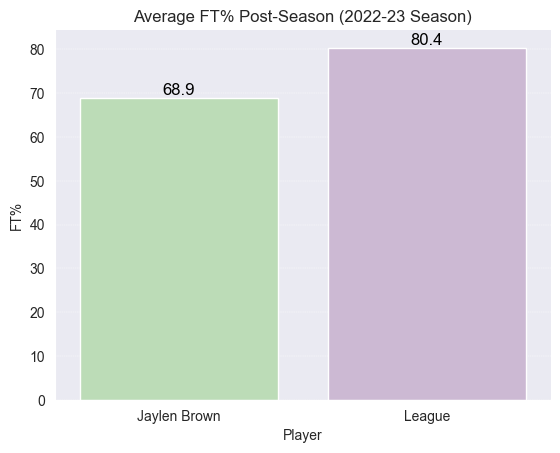

In [108]:
jb_ft_postseason = df_jb_postseason.loc[df_jb_postseason['Season'] == '2022-23', 'FT%'].item()
league_ft_postseason = df_adjusted_postseason_gp['FT%'].mean()

data =[['Jaylen Brown', jb_ft_postseason], ['League', league_ft_postseason]]

final_df = pd.DataFrame(data, columns=['Player', 'FT%'])

colours = ['springgreen', 'royalblue']
  
ax = sns.barplot(x='Player', y=final_df['FT%']*100, data=final_df, palette='PRGn_r')
sns.despine()
plt.grid(axis='y', linewidth = 0.3, linestyle='--')
plt.title('Average FT% Post-Season (2022-23 Season)')
for bar in ax.patches:
  bar_value = bar.get_height()
  text = f'{round(bar_value, 2)}'
  x_pos = bar.get_x() + bar.get_width() / 2
  y_pos = bar.get_y() + bar_value
  ax.text(x_pos, y_pos, text, ha='center', va='bottom',
          size=12, color='black')
plt.show()